In [1]:
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import MetricFunctions

In [2]:
data, meta = arff.loadarff('dataset.arff')
df = pd.DataFrame(data)
for column in df.columns:
    df[column] = df[column].str.decode('utf-8').astype(int)
X = df.drop('Result', axis=1)
y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [3]:
param_grid = {
    'C': [10],#[0.1, 1, 10],
    'kernel': ['rbf'],#['linear', 'rbf'],
    'gamma': [0.1],#['scale', 0.01, 0.1],
    'shrinking': [True],#[True, False],
    'probability': [True],
}

model = SVC(probability=True, kernel='linear')
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

In [4]:
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)

best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)
y_score = y_prob[:, 1]

Best Parameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True, 'shrinking': True}
Best Accuracy:  0.9640434192672999


In [5]:
MetricFunctions.printAccuracy(best_model, X_train, X_test, y_train, y_test)
MetricFunctions.printLoss(best_model, X_train, X_test, y_train, y_test)

Test accuracy: 96.47%
Train accuracy: 98.46%
Test Log Loss: 0.11357905418379718
Train Log Loss: 0.053951719790795216


In [6]:
MetricFunctions.printAUCandPvalues(y_test, y_score)

AUC-ROC: 0.9903615662871527
P-value: 0.019276867425694677


In [7]:
MetricFunctions.printAUCPRandF1Scores(y_test, y_pred, y_score)

AUC-PR: 0.9911036622677518
F1 Score: 0.969315499606609


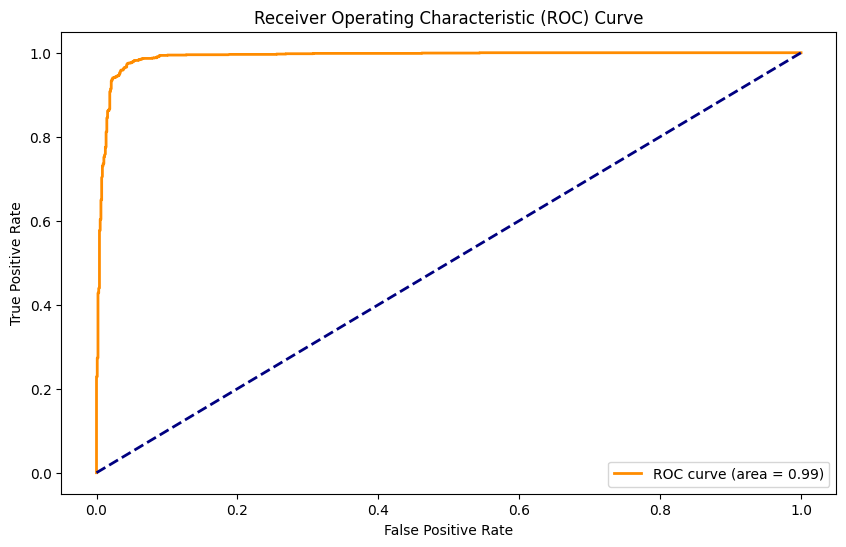

In [8]:
MetricFunctions.plotROCCurve(y_test, y_score)

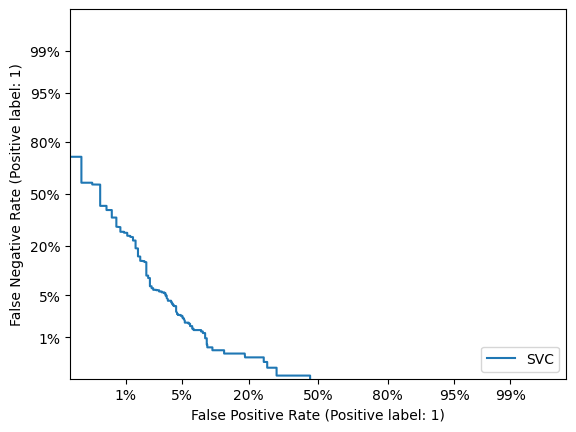

In [9]:
MetricFunctions.plotDetCurve(best_model, X_test, y_test)

Confusion Matrix:
[[ 901   55]
 [  23 1232]]


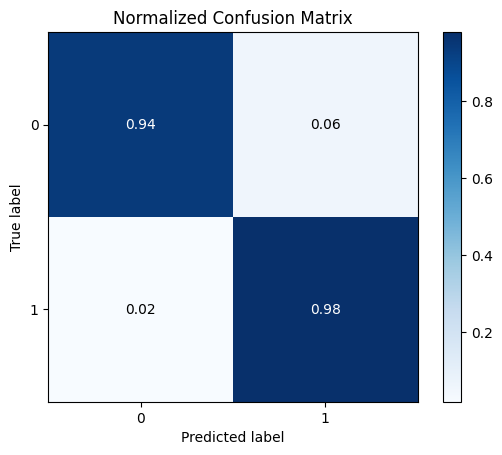

In [10]:
MetricFunctions.printConfMatrix(y_test, y_pred)
MetricFunctions.plotConfMatrix(y_test, y_pred)

C:\Users\Simonas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


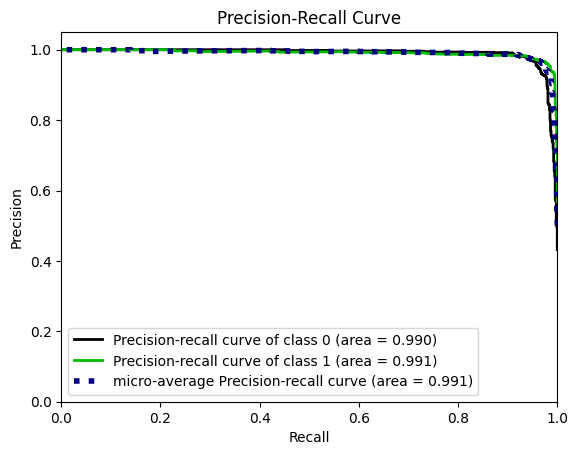

In [11]:
MetricFunctions.plotPrecisionRecallCurve(y_test, y_prob)

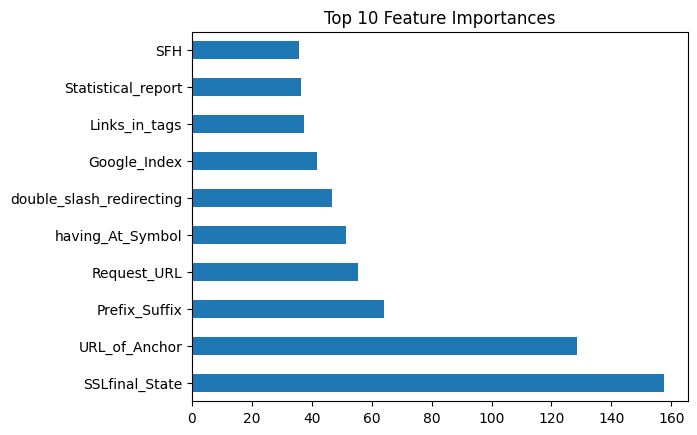

In [12]:
support_vectors_coeff = best_model.dual_coef_
support_vectors_indices = best_model.support_
feature_importances = np.dot(support_vectors_coeff, best_model.support_vectors_)
total_feature_importances = np.sum(feature_importances, axis=0)
feat_importances = pd.Series(np.abs(total_feature_importances), index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

In [13]:
import joblib
joblib.dump(best_model, 'models/svm_model.pkl')

['models/svm_model.pkl']